In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import json

In [5]:
root_dir = '../sdc.broadband_dev'
print(os.path.isdir(root_dir))

True


In [6]:
paths = [path for path in Path(root_dir).rglob("distribution/**/*.csv.xz")]
print(len(paths))

13


In [7]:
tdf = pd.read_csv(paths[0], low_memory=False)

In [8]:
tdf

,geoid,region_type,region_name,year,measure,value,measure_type,measure_units
0,516500115004,block group,"Block Group 4, Census Tract 115, Hampton city,...",2021,perc_income_avg_nat_package,0.723532,percent,NaN
1,517100043003,block group,"Block Group 3, Census Tract 43, Norfolk city, ...",2021,perc_income_avg_nat_package,8.805320,percent,NaN
2,511990510002,block group,"Block Group 2, Census Tract 510, York County, ...",2021,perc_income_avg_nat_package,1.209449,percent,NaN
3,510594327021,block group,"Block Group 1, Census Tract 4327.02, Fairfax C...",2021,perc_income_avg_nat_package,0.713496,percent,NaN
4,515102003032,block group,"Block Group 2, Census Tract 2003.03, Alexandri...",2021,perc_income_avg_nat_package,5.553949,percent,NaN
...,...,...,...,...,...,...,...,...
13353,24025,county,"Harford County, Maryland",2021,perc_income_avg_nat_package,0.861498,percent,NaN
13354,24011,county,"Caroline County, Maryland",2021,perc_income_avg_nat_package,1.309731,percent,NaN
13355,24015,county,"Cecil County, Maryland",2021,perc_income_avg_nat_package,0.998868,percent,NaN
13356,24009,county,"Calvert County, Maryland",2021,perc_income_avg_nat_package,0.702570,percent,NaN


In [10]:
set(tdf.columns)

{'geoid',
 'measure',
 'measure_type',
 'measure_units',
 'region_name',
 'region_type',
 'value',
 'year'}

In [6]:
def binarize_null(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if pd.isnull(x) else 0)
    return df

In [7]:
bdf = binarize_null(tdf)

Text(0.5, 1.0, 'ncr_broadbandnow_acs_sdad_2021_perc_income_on_internet.csv.xz')

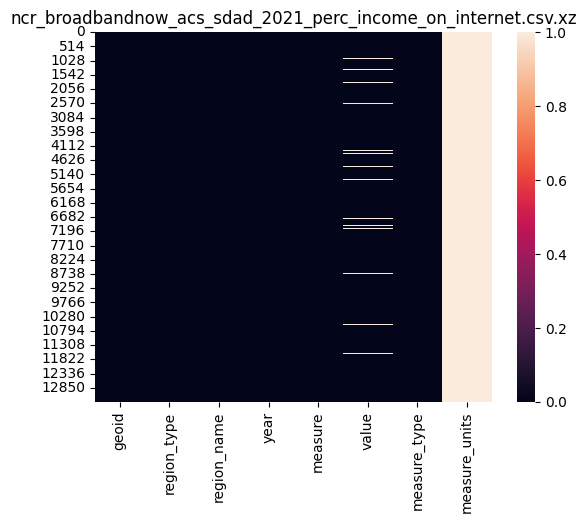

In [8]:
sns.heatmap(data=bdf, vmin=0, vmax=1).set_title(paths[0].name)

In [9]:
bdf.sum()

geoid                0
region_type          0
region_name          0
year                 0
measure              0
value              414
measure_type         0
measure_units    13358
dtype: int64

In [10]:
tdf.sum()

geoid                0
region_type          0
region_name          0
year                 0
measure              0
value              414
measure_type         0
measure_units    13358
dtype: int64

In [17]:
legacy_val_empty = None
new_val_empty = None

for path in paths:
    df = pd.read_csv(path, low_memory=False)
    print(path)
    print(df['measure'].unique())
    
    with open(os.path.join(path.parent, 'measure_info.json'), 'r') as f:
        measure_info = json.load(f)
    print('Inside measure info [%s]: %s' % (measure_info['measure'], measure_info['short_name']))
    bdf = binarize_null(df)
#     sns.heatmap(data=bdf, vmin=0, vmax=1).set_title(path.name)
#     plt.show()
    print(bdf.sum())
    
    if 'legacy' in str(path):
        if legacy_val_empty is None:
            legacy_val_empty = bdf.sum()
        else:
            legacy_val_empty += bdf.sum()
    else:
        if new_val_empty is None:
            new_val_empty = bdf.sum()
        else:
            new_val_empty += bdf.sum()
    print('-'*80)

../sdc.broadband_dev/Wired/Affordability/Percentage of income for internet (average)/data/distribution/ncr_broadbandnow_acs_sdad_2021_perc_income_on_internet.csv.xz
['perc_income_avg_nat_package']
Inside measure info [perc_income_avg_nat_package]: Percentage of income for internet (average)
geoid                0
region_type          0
region_name          0
year                 0
measure              0
value              414
measure_type         0
measure_units    13358
dtype: int64
--------------------------------------------------------------------------------
../sdc.broadband_dev/Wired/Affordability/Percentage of income for good internet/data/distribution/ncr_broadbandnow_acs_sdad_2021_perc_income_on_internet.csv.xz
['perc_income_min_price_25']
Inside measure info [perc_income_min_price_25]: Percentage of income for good internet
geoid                0
region_type          0
region_name          0
year                 0
measure              0
value                0
measure_type    

In [12]:
print('legacy val empety: ',legacy_val_empty)
print()
print('new val empty: ',new_val_empty)

legacy val empety:  None

new val empty:  geoid                 0
region_type           0
region_name           0
year                104
measure               0
value              2171
measure_type          0
measure_units    359581
dtype: int64


# Insepction

In [19]:
good_df = pd.read_csv('../sdc.broadband_dev/Wired/Accessibility/Percent Good (total)/data/distribution/ncr_hdcttrbg_2019_2021q3_percent_above_threshold.csv.xz')
fast_df = pd.read_csv('../sdc.broadband_dev/Wired/Accessibility/Percent Fast (total)/data/distribution/ncr_hdcttrbg_2019_2021q3_percent_above_threshold.csv.xz')

In [20]:
good_df
good_df[good_df['region_type']=='health district']

,geoid,region_type,region_name,year,measure,value,measure_type,measure_units
21973,51_hd_01,health district,Alexandria,2019.0,perc_total_25_3_using_devices,79.367134,percent,NaN
21974,51_hd_01,health district,Alexandria,2021.0,perc_total_25_3_using_devices,83.898356,percent,NaN
21975,51_hd_01,health district,Alexandria,2020.0,perc_total_25_3_using_devices,82.495094,percent,NaN
21976,51_hd_02,health district,Alleghany,2021.0,perc_total_25_3_using_devices,76.187560,percent,NaN
21977,51_hd_02,health district,Alleghany,2020.0,perc_total_25_3_using_devices,75.506286,percent,NaN
...,...,...,...,...,...,...,...,...
22073,51_hd_34,health district,West Piedmont,2020.0,perc_total_25_3_using_devices,55.683950,percent,NaN
22074,51_hd_34,health district,West Piedmont,2019.0,perc_total_25_3_using_devices,51.861632,percent,NaN
22075,51_hd_35,health district,Western Tidewater,2020.0,perc_total_25_3_using_devices,74.759785,percent,NaN
22076,51_hd_35,health district,Western Tidewater,2019.0,perc_total_25_3_using_devices,68.185648,percent,NaN


In [21]:
fast_df

,geoid,region_type,region_name,year,measure,value,measure_type,measure_units
0,510010901001,block group,"Block Group 1, Census Tract 901, Accomack Coun...",2019.0,perc_total_100_20_using_devices,0.705755,percent,NaN
1,510010901002,block group,"Block Group 2, Census Tract 901, Accomack Coun...",2019.0,perc_total_100_20_using_devices,0.278100,percent,NaN
2,510010901003,block group,"Block Group 3, Census Tract 901, Accomack Coun...",2019.0,perc_total_100_20_using_devices,0.475628,percent,NaN
3,510010901004,block group,"Block Group 4, Census Tract 901, Accomack Coun...",2019.0,perc_total_100_20_using_devices,0.230163,percent,NaN
4,510010902001,block group,"Block Group 1, Census Tract 902, Accomack Coun...",2019.0,perc_total_100_20_using_devices,0.017623,percent,NaN
...,...,...,...,...,...,...,...,...
39938,11001011100,tract,"Census Tract 111, District of Columbia, Distri...",2020.0,perc_total_100_20_using_devices,70.312214,percent,NaN
39939,11001011100,tract,"Census Tract 111, District of Columbia, Distri...",2021.0,perc_total_100_20_using_devices,83.572164,percent,NaN
39940,11001,county,"District of Columbia, District of Columbia",2019.0,perc_total_100_20_using_devices,59.655642,percent,NaN
39941,11001,county,"District of Columbia, District of Columbia",2020.0,perc_total_100_20_using_devices,71.911771,percent,NaN


In [27]:
test_df = pd.read_csv('../sdc.broadband_dev/Wired/Adoption/Households with cable, fiber optic, or DSL/data/distribution/ncr_hdcttrbg_2017_2019_broadband_withoutint_compdev.csv.xz')

In [28]:
test_df['geoid'].unique()

array(['51181', '51043', '51117', '51015', '51075', '51113', '51161',
       '51025', '51131', '51163', '51720', '51570', '51021', '51023',
       '51520', '51830', '51035', '51191', '51139', '51510', '51650',
       '51013', '51027', '51179', '51760', '51057', '51185', '51685',
       '51183', '51683', '51775', '51037', '51081', '11001', '24047',
       '24041', '24027', '24033', '24003', '24005', '24021', '24009',
       '24023', '24029', '24031', '24013', '24035', '24037', '24017',
       '24019', '24043', '24045', '24015', '24011', '51093', '51620',
       '51678', '51089', '51101', '51109', '51147', '51165', '24510',
       '24039', '24025', '24001', '51095', '51167', '51173', '51540',
       '51031', '51087', '51099', '51103', '51105', '51115', '51119',
       '51149', '51159', '51169', '51177', '51011', '51067', '51097',
       '51121', '51127', '51049', '51051', '51083', '51107', '51153',
       '51175', '51091', '51033', '51073', '51141', '51145', '51171',
       '51061', '517